In [1]:
from keypress_recognition.models import white_bundle_model as wmodel
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt
import torch

w_bundle_fc_in 4992


In [2]:
dataset.load_all_data(train=100, test=20, val=10)

# of X_train: 100
# of X_test: 20
# of X_val: 10


In [3]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Pressed" if note else "Not Pressed")
visualize_keys(True)

'Pressed'

Samples from X_train: 


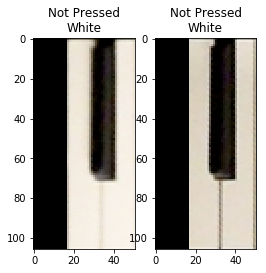

Samples from X_test: 


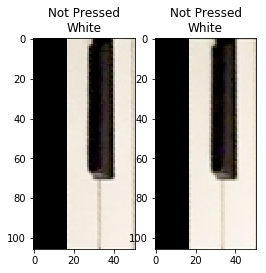

Samples from X_val: 


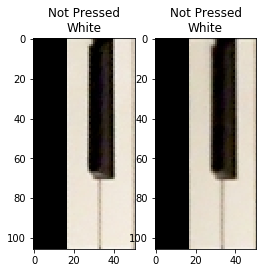

In [4]:
# print several images with labels

for _type in ['train', 'test', 'val']:

    print(f'Samples from X_{_type}: ')

    fig, axarr = plt.subplots(1, 2, figsize=[4, 6])

    for i in range(0, 2):
        imgw, _, notew, _ = dataset.get_sample(_type, method=1)
        axarr[i].imshow(imgw[0])
        axarr[i].set_title(visualize_keys(notew[0]) + '\nWhite')

    plt.show()

In [5]:
wmodel.train(dataset, batch_size=32, num_epochs=10,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_white_model.tar',
                     current_path='keypress_recognition/current_white.tar',
                     method=1, key_type='white')

Epoch 1/10


IntProgress(value=0)

RuntimeError: CUDA out of memory. Tried to allocate 270.00 MiB (GPU 0; 6.00 GiB total capacity; 4.45 GiB already allocated; 154.84 MiB free; 6.06 MiB cached)

In [ ]:
Xw, _, yw, _ = dataset.get_sample('train', method=1)
plt.imshow(Xw[0])

Xw = np.transpose(np.array(Xw), (0, 3, 1, 2))
yw_pred = wmodel.evaluate(torch.Tensor(Xw).cuda())[0]
print("Ground Truth:", yw[0])
print("Predict:     ", visualize_keys(yw_pred))

plt.show()